<a href="https://colab.research.google.com/github/sarasti2/AI_UdeA_2024-1/blob/main/fase-1/Modelo_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Configuraciones iniciales del entorno de trabajo

In [33]:
# Cargar las librerias que se usaran
import numpy as np # Algebra lineal
import pandas as pd # Dataframe tabulares
import os # Permite utilizar funcionalidades del sistema operativo
import seaborn as sns # Graficas estadisticas
from sklearn.model_selection import train_test_split # Creación de subconjuntos
from sklearn.preprocessing import LabelEncoder # Codificar etiquetas
import xgboost as xgb # Algoritmo para la generación de modelos xgboost
import matplotlib.pyplot as plt # Graficas
from matplotlib.pyplot import figure

In [ ]:
# Cargar los datos desde Kaggle
# ¡IMPORTANTE! subir el archivo .json, que representa el "Token" de Kaggle que
# se genera según las instrucciones en el readme
os.environ['KAGGLE_CONFIG_DIR']="."
!kaggle competitions download -c predicting-red-hat-business-value
!unzip predicting-red-hat-business-value.zip

In [3]:
# La base de datos esta compuesta por una de personas, y otra de las actividades
# que hacen las personas, cada persona tiene un identificador unico que permite
# crea una sola base con ambas informaciones.

train_df = pd.read_csv('act_train.csv.zip')
people_df = pd.read_csv('people.csv.zip')


# 1. Exploración


In [4]:
# Revisión de tipo de cada columna
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   people_id          object
 1   activity_id        object
 2   date               object
 3   activity_category  object
 4   char_1             object
 5   char_2             object
 6   char_3             object
 7   char_4             object
 8   char_5             object
 9   char_6             object
 10  char_7             object
 11  char_8             object
 12  char_9             object
 13  char_10            object
 14  outcome            int64 
dtypes: int64(1), object(14)
memory usage: 251.5+ MB


In [5]:
# Revisión de tipo de cada columna
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189118 entries, 0 to 189117
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   people_id  189118 non-null  object
 1   char_1     189118 non-null  object
 2   group_1    189118 non-null  object
 3   char_2     189118 non-null  object
 4   date       189118 non-null  object
 5   char_3     189118 non-null  object
 6   char_4     189118 non-null  object
 7   char_5     189118 non-null  object
 8   char_6     189118 non-null  object
 9   char_7     189118 non-null  object
 10  char_8     189118 non-null  object
 11  char_9     189118 non-null  object
 12  char_10    189118 non-null  bool  
 13  char_11    189118 non-null  bool  
 14  char_12    189118 non-null  bool  
 15  char_13    189118 non-null  bool  
 16  char_14    189118 non-null  bool  
 17  char_15    189118 non-null  bool  
 18  char_16    189118 non-null  bool  
 19  char_17    189118 non-null  bool  
 20  char

In [9]:
# Revision superficial en forma de tabla
train_df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [10]:
# Revision superficial en forma de tabla
people_df.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [7]:
# revision del porcentaje de valores nulos en cada columna
train_df.isnull().sum()*100/train_df.shape[0]

# Las columnas char_# del 1 al 10, tienen gran cantidad de datos vacios

people_id             0.000000
activity_id           0.000000
date                  0.000000
activity_category     0.000000
char_1               92.826849
char_2               92.826849
char_3               92.826849
char_4               92.826849
char_5               92.826849
char_6               92.826849
char_7               92.826849
char_8               92.826849
char_9               92.826849
char_10               7.173151
outcome               0.000000
dtype: float64

In [11]:
# Por la cantidad de valores vacios, se procedera a eliminar los char_#

train_df = train_df.drop(['char_1', 'char_2', 'char_3',
                          'char_4', 'char_5', 'char_6',
                         'char_7', 'char_8', 'char_9',
                         'char_10'], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Data columns (total 5 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   people_id          object
 1   activity_id        object
 2   date               object
 3   activity_category  object
 4   outcome            int64 
dtypes: int64(1), object(4)
memory usage: 83.8+ MB


In [8]:
# revision del porcentaje de valores nulos en cada columna
people_df.isnull().sum()*100/people_df.shape[0]

# La base de datos se encuentra completa

people_id    0.0
char_1       0.0
group_1      0.0
char_2       0.0
date         0.0
char_3       0.0
char_4       0.0
char_5       0.0
char_6       0.0
char_7       0.0
char_8       0.0
char_9       0.0
char_10      0.0
char_11      0.0
char_12      0.0
char_13      0.0
char_14      0.0
char_15      0.0
char_16      0.0
char_17      0.0
char_18      0.0
char_19      0.0
char_20      0.0
char_21      0.0
char_22      0.0
char_23      0.0
char_24      0.0
char_25      0.0
char_26      0.0
char_27      0.0
char_28      0.0
char_29      0.0
char_30      0.0
char_31      0.0
char_32      0.0
char_33      0.0
char_34      0.0
char_35      0.0
char_36      0.0
char_37      0.0
char_38      0.0
dtype: float64

# 2. Crear una base de datos consolidada

In [12]:
# Se une por el identificador unico de persona
train_df.set_index('people_id')
people_df.set_index('people_id')
df = pd.merge(train_df, people_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132273 entries, 0 to 132272
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   people_id          132273 non-null  object
 1   activity_id        132273 non-null  object
 2   date               132273 non-null  object
 3   activity_category  132273 non-null  object
 4   outcome            132273 non-null  int64 
 5   char_1             132273 non-null  object
 6   group_1            132273 non-null  object
 7   char_2             132273 non-null  object
 8   char_3             132273 non-null  object
 9   char_4             132273 non-null  object
 10  char_5             132273 non-null  object
 11  char_6             132273 non-null  object
 12  char_7             132273 non-null  object
 13  char_8             132273 non-null  object
 14  char_9             132273 non-null  object
 15  char_10            132273 non-null  bool  
 16  char_11            1

In [14]:
# Dar el formato adecuado a las columnas
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['isweekend'] = (df['date'].dt.weekday >= 5).astype(int)
df = df.drop('date', axis = 1)
df.head()

,people_id,activity_id,activity_category,outcome,char_1,group_1,char_2,char_3,char_4,char_5,...,char_33,char_34,char_35,char_36,char_37,char_38,year,month,day,isweekend
0,ppl_100006,act2_2380649,type 3,1,type 2,group 6534,type 3,type 40,type 25,type 9,...,False,False,True,True,False,84,2022,7,27,0
1,ppl_100019,act2_1681678,type 3,1,type 2,group 45749,type 3,type 40,type 25,type 9,...,False,False,False,False,False,84,2023,3,26,1
2,ppl_100019,act2_763203,type 3,1,type 2,group 45749,type 3,type 40,type 25,type 9,...,False,False,False,False,False,84,2023,3,26,1
3,ppl_100025,act2_2597743,type 3,0,type 2,group 36096,type 3,type 14,type 6,type 8,...,False,False,False,False,False,76,2022,8,26,0
4,ppl_100025,act2_3280131,type 2,0,type 2,group 36096,type 3,type 14,type 6,type 8,...,False,False,False,False,False,76,2022,8,26,0


# 3. Preprocesamiento

0    83034
1    49239
Name: outcome, dtype: int64


<Axes: xlabel='outcome', ylabel='count'>

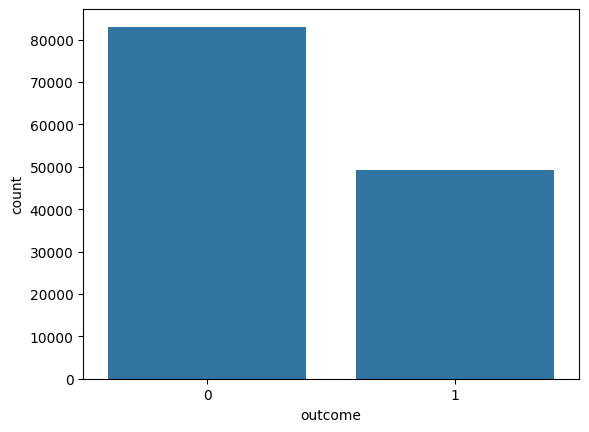

In [18]:
# Distribución de los resultados
print(df['outcome'].value_counts())
sns.countplot(x="outcome", data=df)

# Esta desequilibrada la variable que se quiere predecir

In [24]:
# Dividir las columnas en categoricas y numericas
categorical_features = []
numeric_features = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype != 'object':
        numeric_features.append(col)
    else:
        categorical_features.append(col)

In [27]:
# Codificar las columnas categoricas para que sean interpretables por el algoritmo

for col in categorical_features:
    le = LabelEncoder()
    le.fit(list(df[col].astype(str).values))
    df[col] = le.transform(list(df[col].astype(str).values))

In [29]:
# Creación de los sub-conjuntos de prueba y verificación
y = df['outcome']
X = df.drop('outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4. Modelo



In [31]:
# Se usara un xgboost debido a que es un problema de clasificación con una alta
# cantidad de datos

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=10, learning_rate=0.05, use_label_encoder=False)
gbm = gbm.fit(X_train, y_train)

In [32]:
# Verificación del rendimiento del modelo, en este caso se usara el criterio
# de exactitud
print("Exactitud conjunto de entrenamiento: {:.3f}".format(gbm.score(X_train, y_train)))
print("Exactitud conjunto de verificacion: {:.3f}".format(gbm.score(X_test, y_test)))

Exactitud conjunto de entrenamiento: 0.856
Exactitud conjunto de verificacion: 0.854


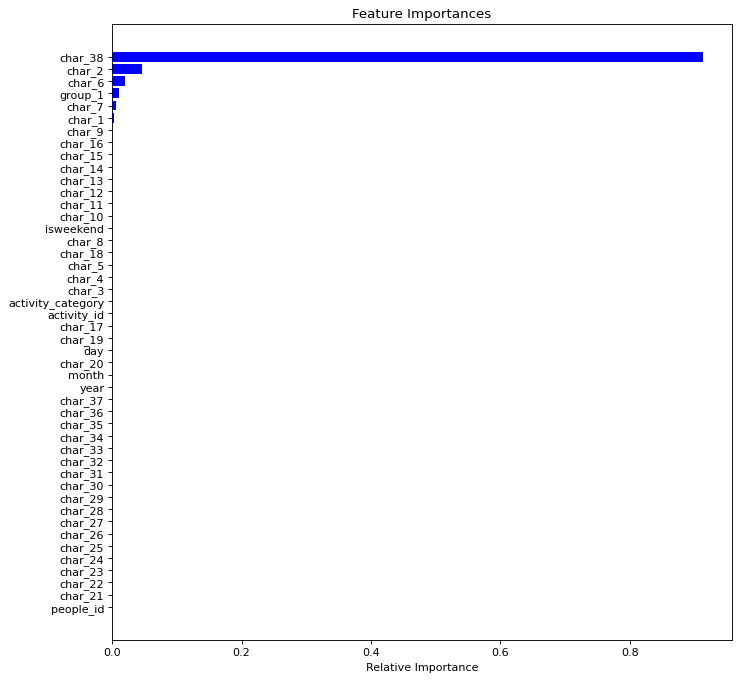

In [34]:
# Graficar la importancia de las variables en el modelo entrenado

features = X.columns.values.tolist()
importances = gbm.feature_importances_
indices = np.argsort(importances)

figure(figsize = (10, 10), dpi = 80)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

